## Data Analytics on Startup Data

In [19]:
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Replace the file_id with the file ID you extracted
file_id = '1FRF7dhmyoNO57BlO4exZG7mdqYlbiLU2'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('startup_data.csv')

# Now you can read the file as a pandas DataFrame
df = pd.read_csv('startup_data.csv')


## Descriptive Statistics

In [20]:
df.describe()

,Funding_Amount,Num_Founders,Num_Employees,Age_Months,Revenue,Intellectual_Property
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2.620019e+06,2.402000,27.238000,30.754000,255880.174000,0.530000
std,1.399648e+06,1.113047,13.085711,15.784924,140141.015095,0.499599
min,1.094350e+05,1.000000,5.000000,3.000000,1969.000000,0.000000
25%,1.493081e+06,1.000000,15.000000,17.000000,139558.250000,0.000000
50%,2.692062e+06,2.000000,28.000000,31.000000,247729.000000,1.000000
75%,3.818280e+06,3.000000,39.000000,44.000000,376912.750000,1.000000
max,4.992680e+06,4.000000,49.000000,59.000000,499709.000000,1.000000


## Distribution Analysis

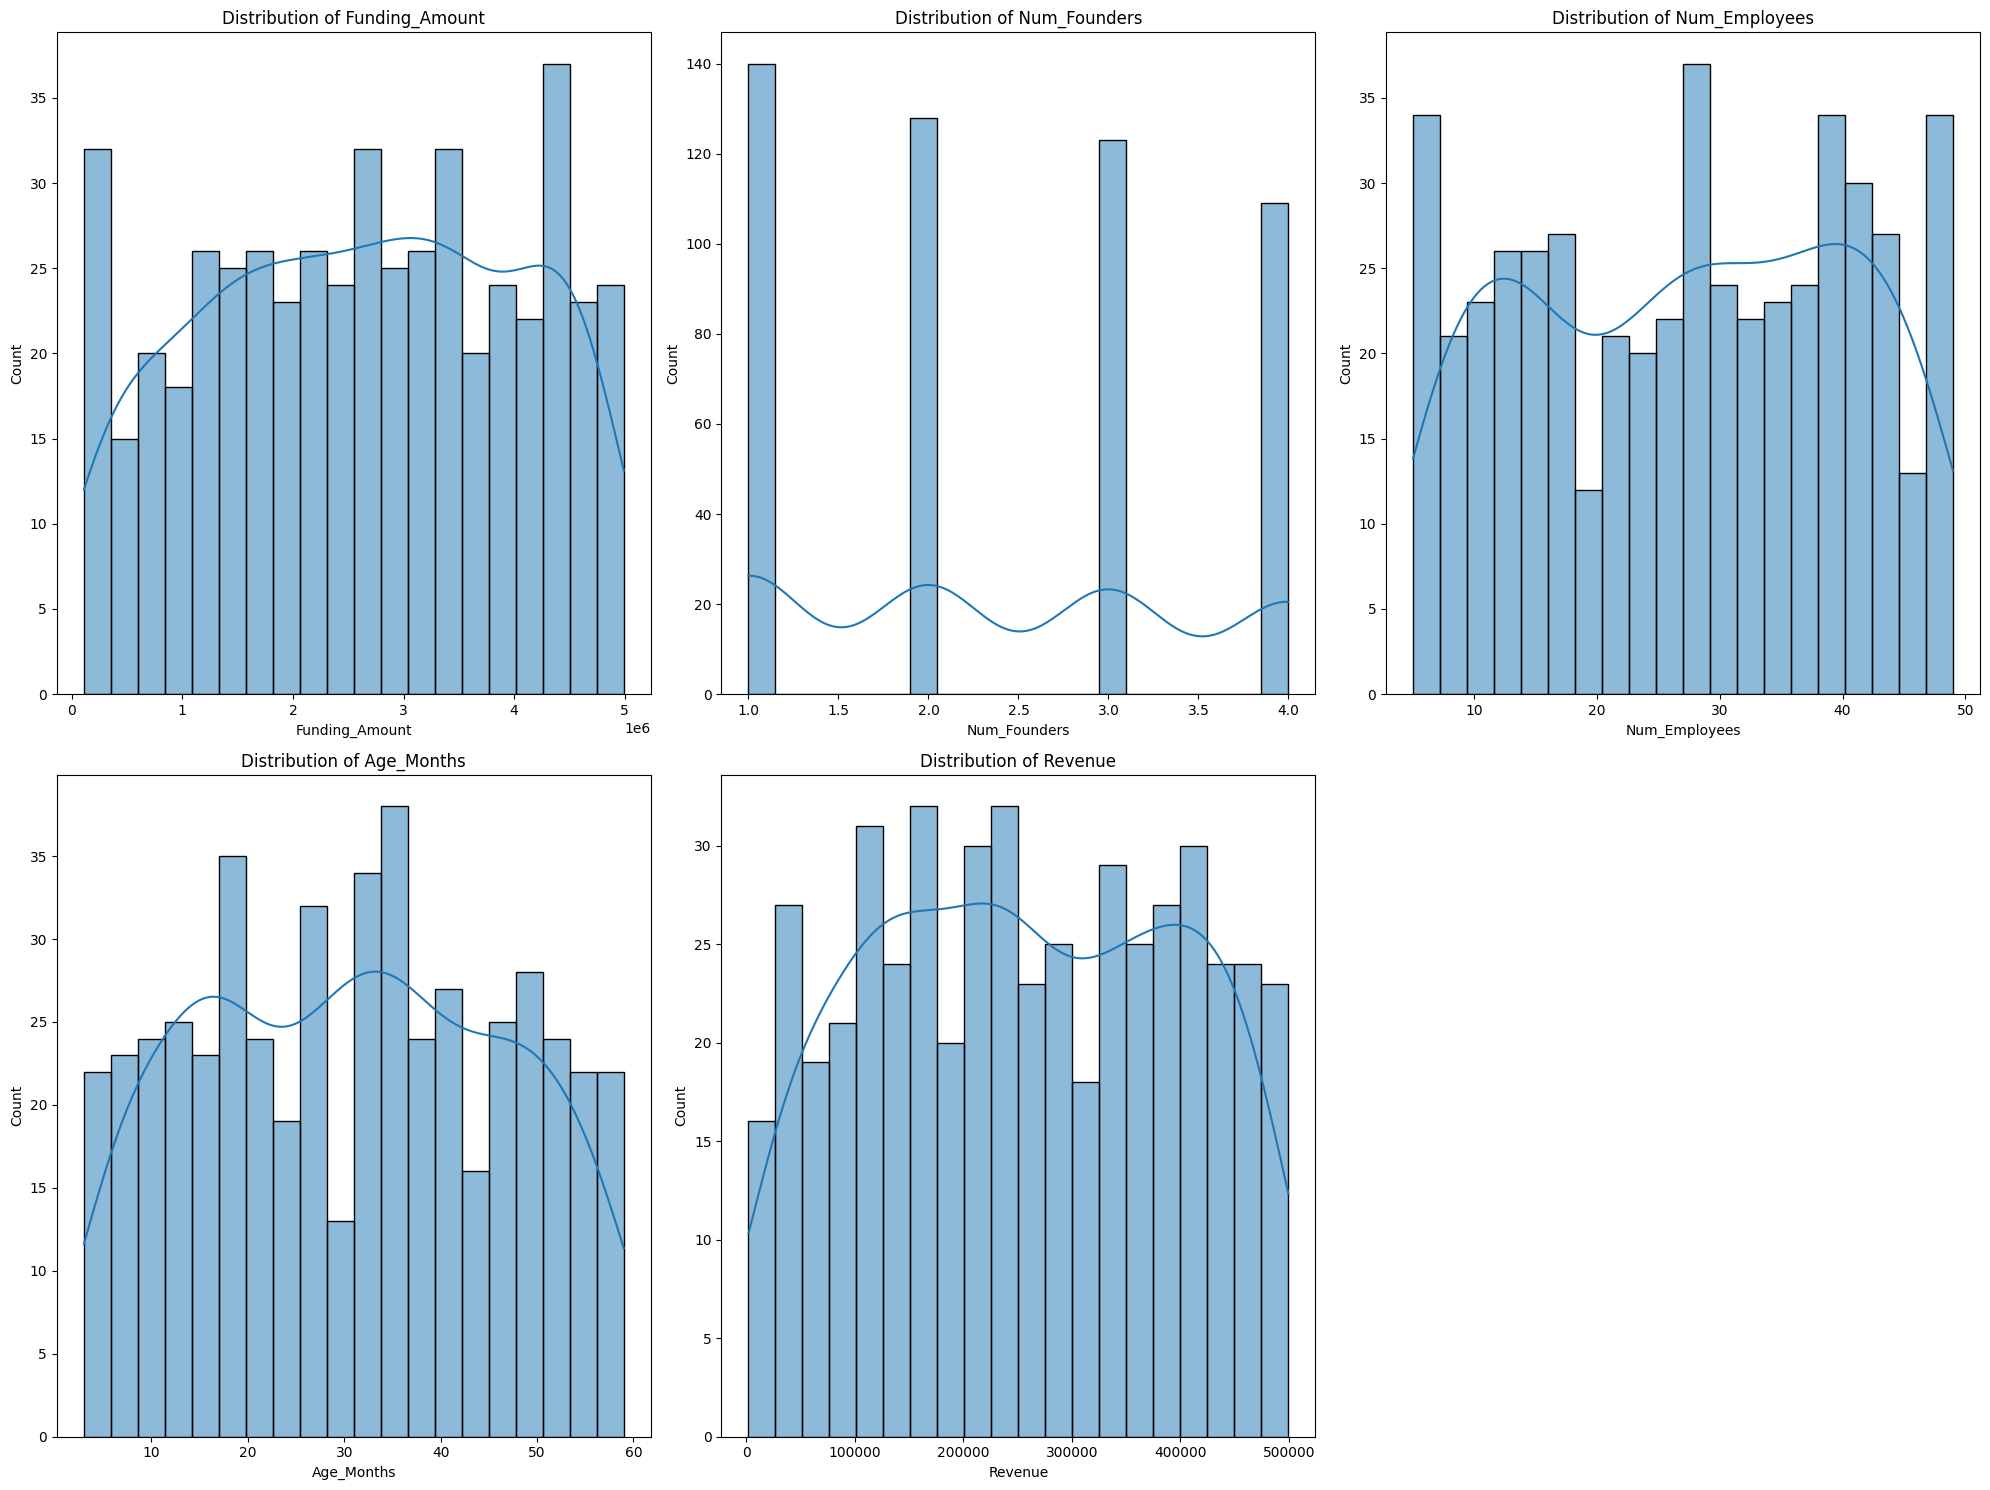

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = ['Funding_Amount', 'Num_Founders', 'Num_Employees', 'Age_Months', 'Revenue']

# Create subplots for each numerical column to show distribution
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


## Correlation Analysis

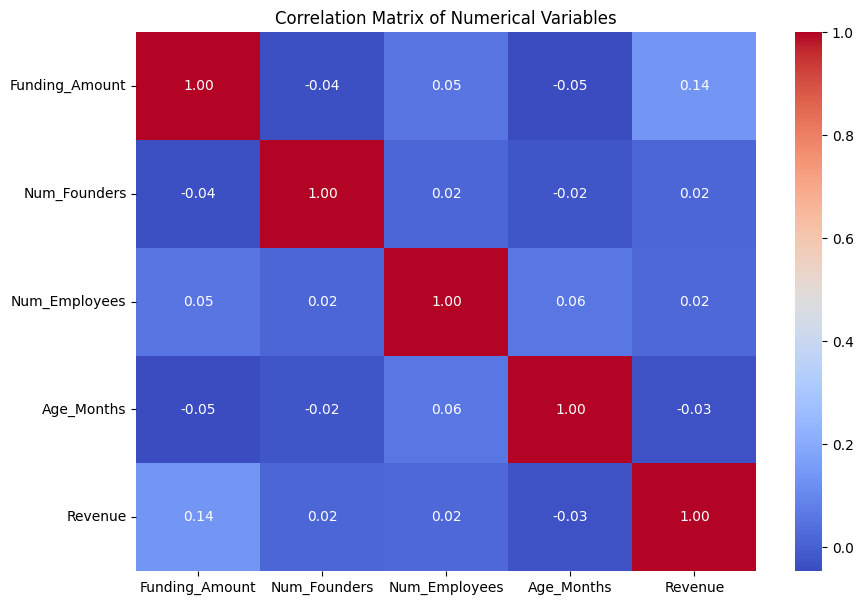

In [ ]:

# Calculate the correlation matrix for numerical variables
correlation_matrix = df[numerical_columns].corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


## Categorical Analysis

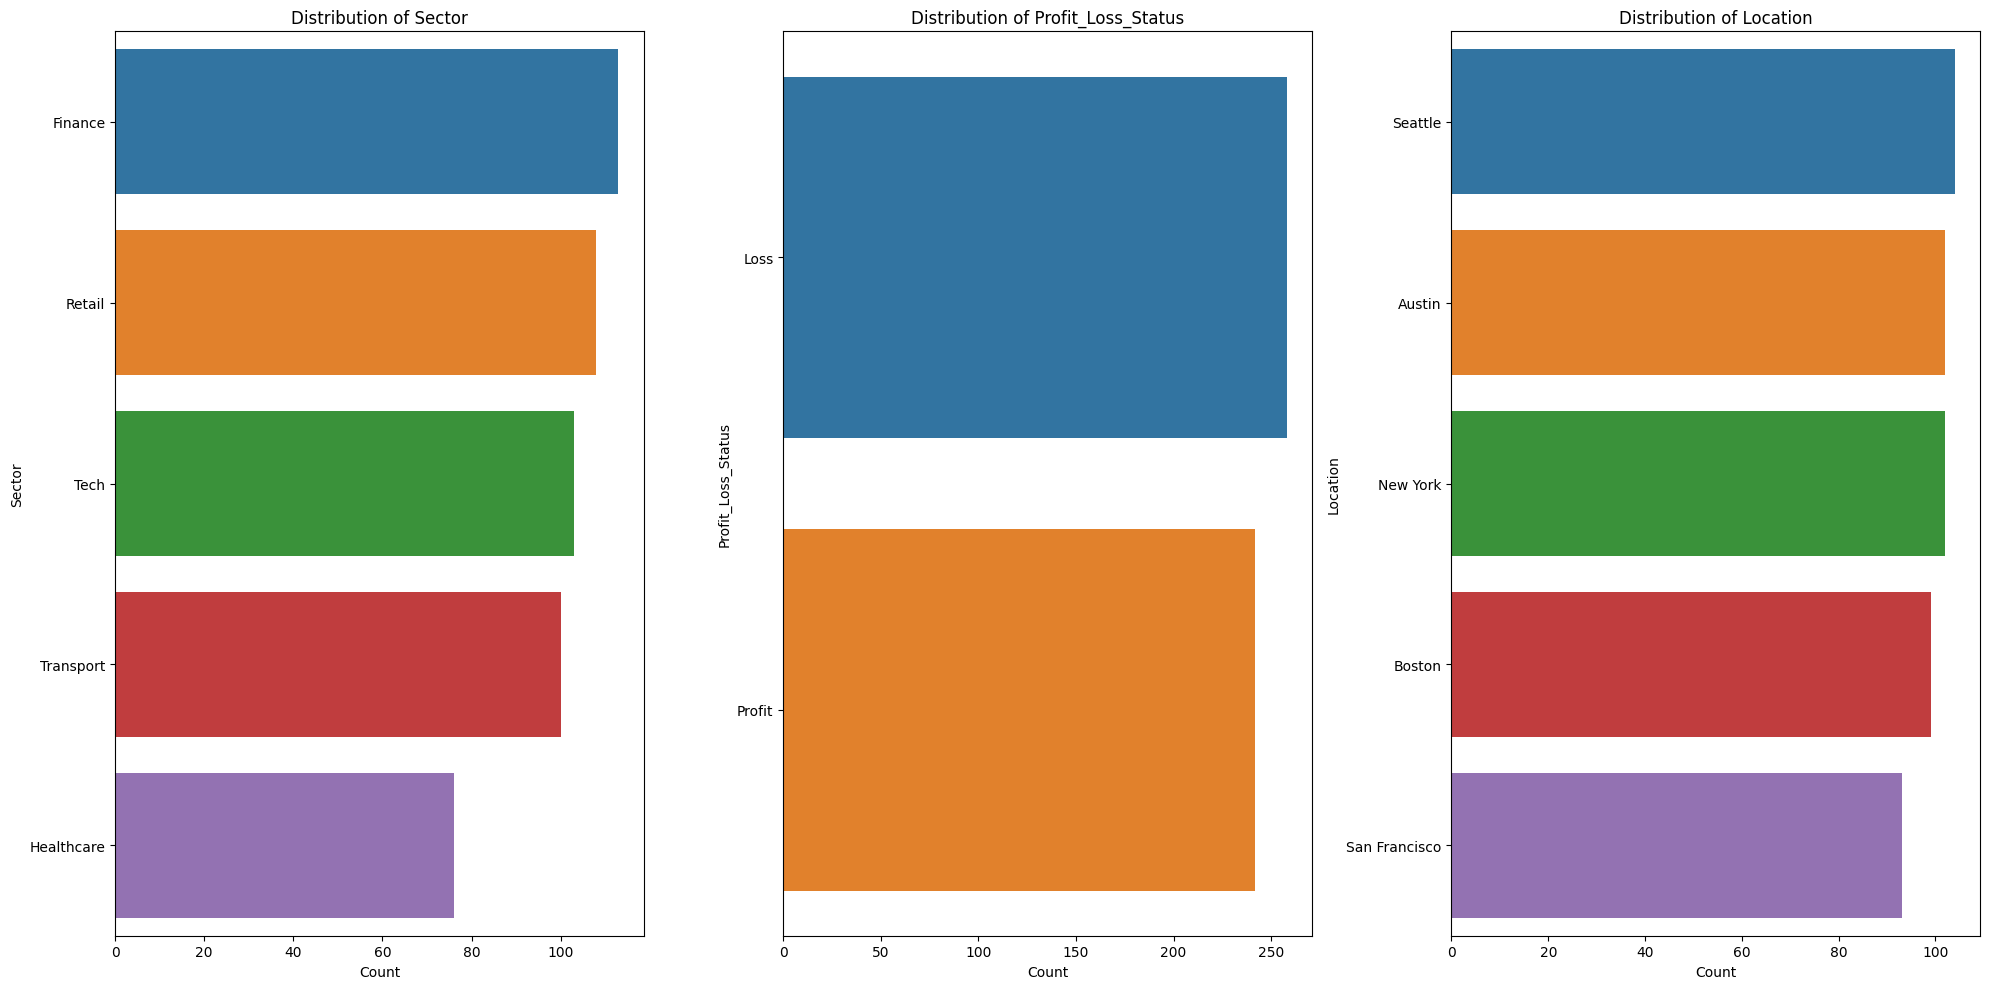

In [ ]:

# List of categorical columns
categorical_columns = ['Sector', 'Profit_Loss_Status', 'Location']

# Create subplots for each categorical column to show distribution
plt.figure(figsize=(20, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')

plt.tight_layout()
plt.show()


## Profit vs Loss Analysis

<ipython-input-7-69adc004c963>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  profit_loss_analysis = df.groupby('Profit_Loss_Status').mean()


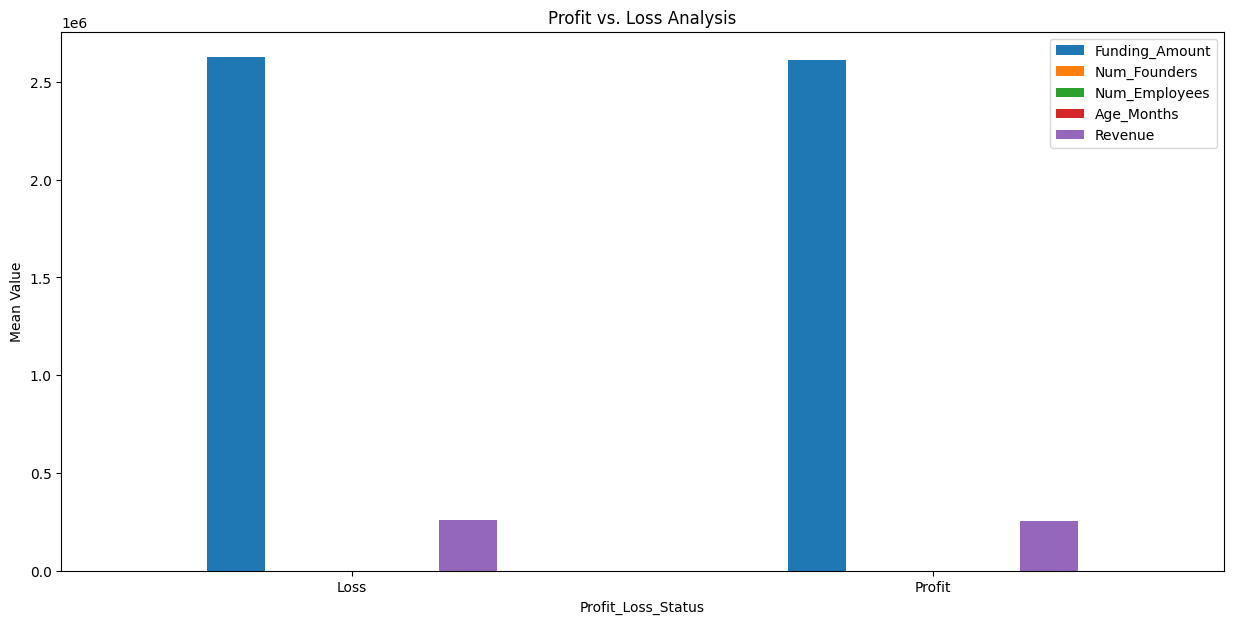

In [ ]:

# Group the data by Profit_Loss_Status and calculate the mean for numerical columns
profit_loss_analysis = df.groupby('Profit_Loss_Status').mean()

# Plotting the key metrics for Profitable vs Non-Profitable Startups
profit_loss_analysis.drop('Intellectual_Property', axis=1).plot(kind='bar', figsize=(15, 7))
plt.title('Profit vs. Loss Analysis')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.show()


## Sector-wise Analysis

<ipython-input-8-fb21d52f84a2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sector_analysis = df.groupby('Sector').mean()


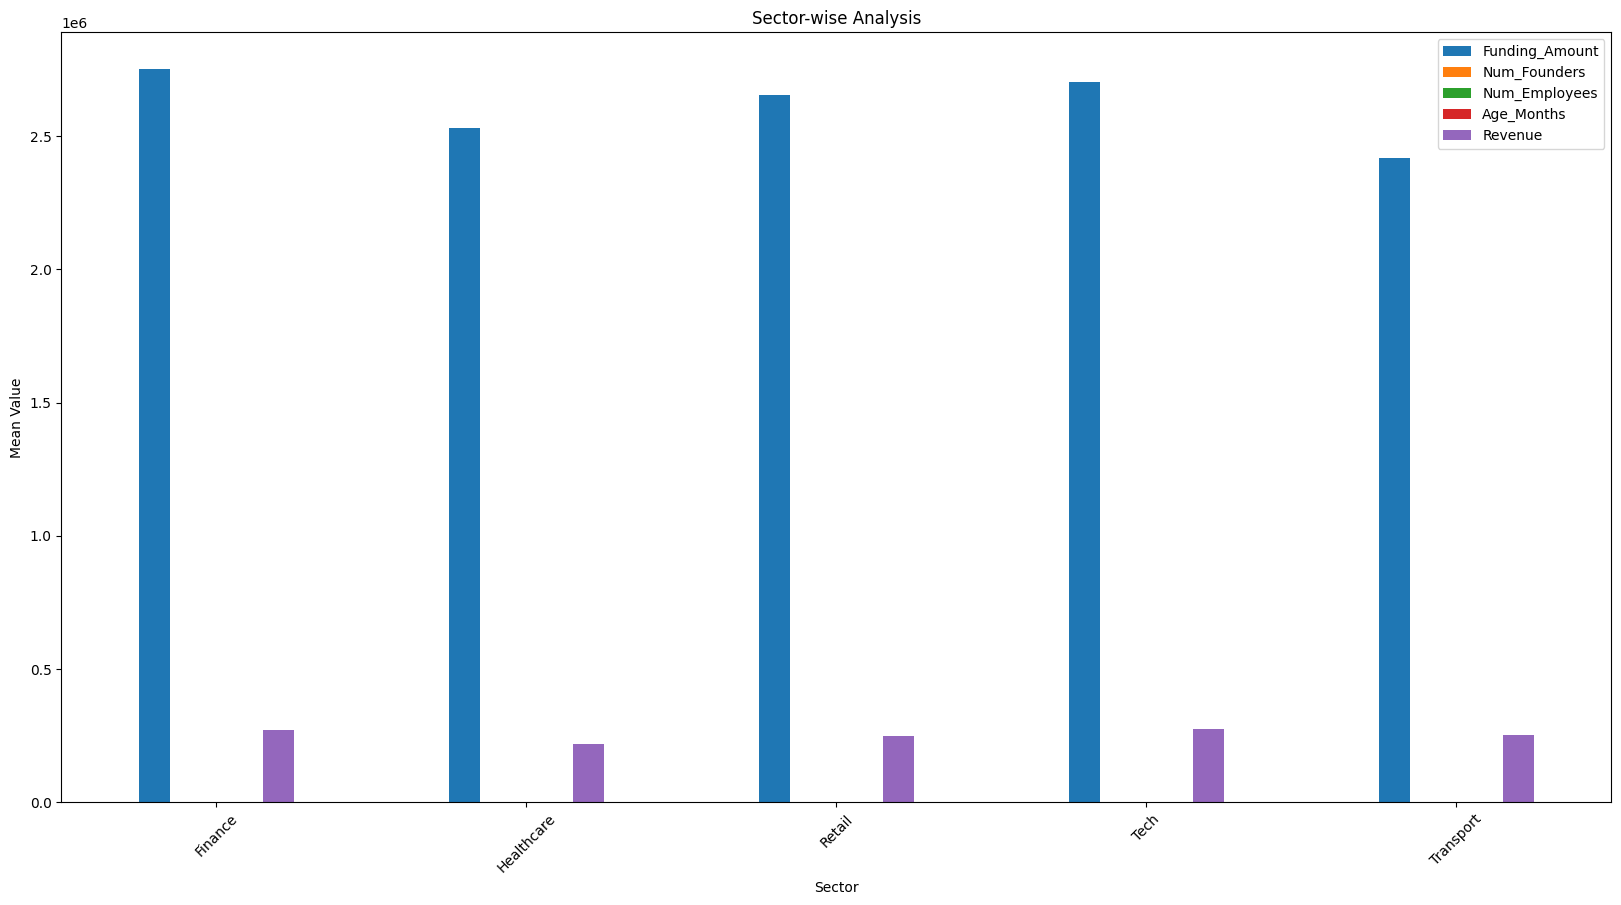

In [ ]:

# Group the data by Sector and calculate the mean for numerical columns
sector_analysis = df.groupby('Sector').mean()

# Plotting the key metrics for different Sectors
sector_analysis.drop('Intellectual_Property', axis=1).plot(kind='bar', figsize=(20, 10))
plt.title('Sector-wise Analysis')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()


## Location-wise Analysis

<ipython-input-9-41f32bede8df>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  location_analysis = df.groupby('Location').mean()


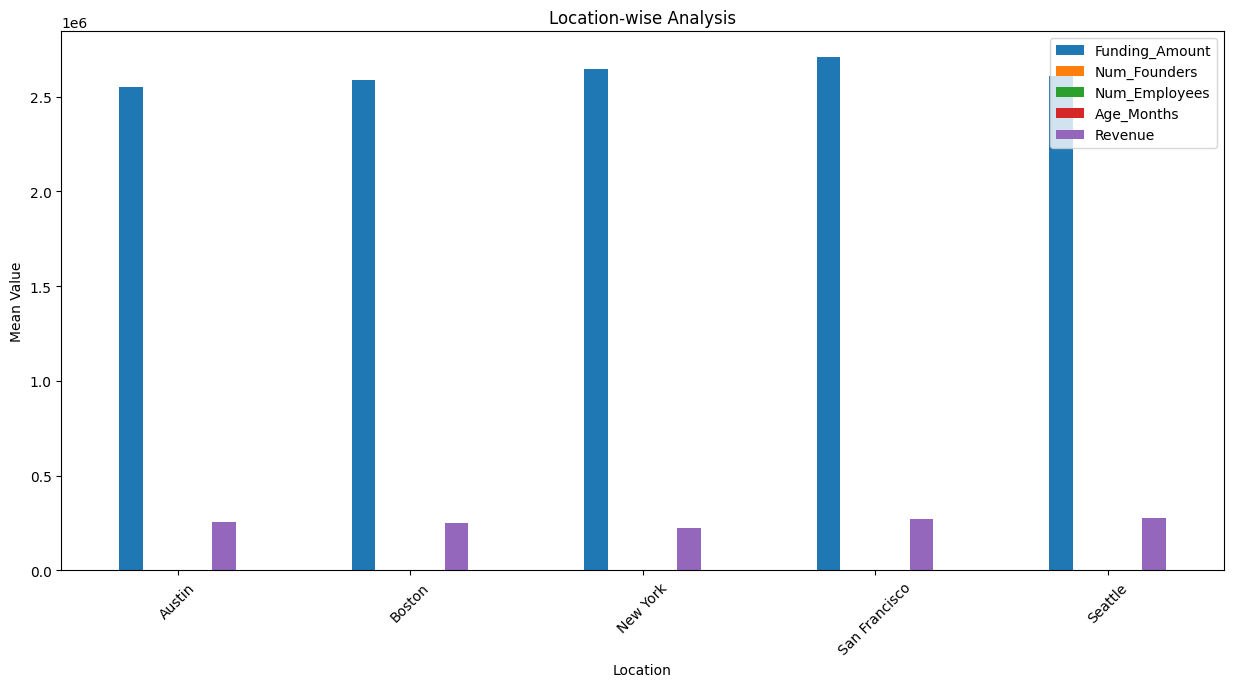

In [ ]:

# Group the data by Location and calculate the mean for numerical columns
location_analysis = df.groupby('Location').mean()

# Plotting the key metrics for different Locations
location_analysis.drop('Intellectual_Property', axis=1).plot(kind='bar', figsize=(15, 7))
plt.title('Location-wise Analysis')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()
